<a href="https://colab.research.google.com/github/danimoreira90/Artificial-Intelligence---Clustering/blob/main/Daniel_Moreira_AT_Intelig%C3%AAncia_Artificial_Clusteriza%C3%A7%C3%A3o_%5B24E2_4%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering, KMeans, DBSCAN
from sklearn.datasets import make_moons, load_breast_cancer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

In [ ]:
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 MB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 18.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 17.3 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.31.0
    Uninstalling requests-2.31.0:
      Successfully uninstalled requests-2.31.0
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 2

In [ ]:
wine_quality = pd.read_csv('/content/WineQT.csv')

In [ ]:
from datasets import load_dataset

amazon_data = load_dataset("SetFit/amazon_massive_intent_en-US")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split:   0%|          | 0/11514 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2033 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2974 [00:00<?, ? examples/s]

In [ ]:
breast_cancer_data = load_breast_cancer()
breast_cancer_df = pd.DataFrame(breast_cancer_data.data, columns=breast_cancer_data.feature_names)
breast_cancer_df['target'] = breast_cancer_data.target

In [ ]:
moons_X, moons_y = make_moons(n_samples=300, noise=0.1, random_state=42)


In [ ]:
def explore_dataset(df, dataset_name):
    print(f"Explorando o dataset: {dataset_name}\n")
    print("Primeiras linhas:")
    print(df.head())
    print("\nInformações:")
    print(df.info())
    print("\nEstatísticas Descritivas:")
    print(df.describe())
    print("\nShape:")
    print(df.shape)
    print("-" * 50)

In [ ]:
explore_dataset(wine_quality, 'Wine Quality')

Explorando o dataset: Wine Quality

Primeiras linhas:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Id  
0     

In [ ]:
url_train = "https://huggingface.co/datasets/SetFit/amazon_massive_intent_en-US/resolve/main/train.jsonl"
url_validation = "https://huggingface.co/datasets/SetFit/amazon_massive_intent_en-US/resolve/main/validation.jsonl"
url_test = "https://huggingface.co/datasets/SetFit/amazon_massive_intent_en-US/resolve/main/test.jsonl"

amazon_train = pd.read_json(url_train, lines=True)

amazon_validation = pd.read_json(url_validation, lines=True)

amazon_test = pd.read_json(url_test, lines=True)

# Visualizar as primeiras linhas do dataset de treinamento
print(amazon_train.head())


   id  label                                 text         label_text
0   1     48      wake me up at nine am on friday          alarm_set
1   2     48  set an alarm for two hours from now          alarm_set
2   4     46                           olly quiet  audio_volume_mute
3   5     46                                 stop  audio_volume_mute
4   6     46           olly pause for ten seconds  audio_volume_mute


In [ ]:
moons_df = pd.DataFrame(moons_X, columns=['X1', 'X2'])
moons_df['y'] = moons_y
explore_dataset(moons_df, 'Make Moons Synthetic')

# Explorar Breast Cancer
explore_dataset(breast_cancer_df, 'Breast Cancer')

Explorando o dataset: Make Moons Synthetic

Primeiras linhas:
         X1        X2  y
0  0.682988 -0.345203  1
1  2.040990 -0.131615  1
2 -0.139752  0.454391  1
3  0.885748  0.286342  0
4  1.182459 -0.497711  1

Informações:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      300 non-null    float64
 1   X2      300 non-null    float64
 2   y       300 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 7.2 KB
None

Estatísticas Descritivas:
               X1          X2           y
count  300.000000  300.000000  300.000000
mean     0.500825    0.256391    0.500000
std      0.876485    0.503362    0.500835
min     -1.227276   -0.672842    0.000000
25%     -0.094171   -0.184390    0.000000
50%      0.461503    0.258601    0.500000
75%      1.096026    0.709077    1.000000
max      2.270386    1.239951    1.000000

Shape:
(300, 3)
--------

##Questão 1:
A)

In [ ]:
scaler = StandardScaler()
wine_scaled = scaler.fit_transform(wine_quality)

linked = linkage(wine_scaled, method='ward')

B)

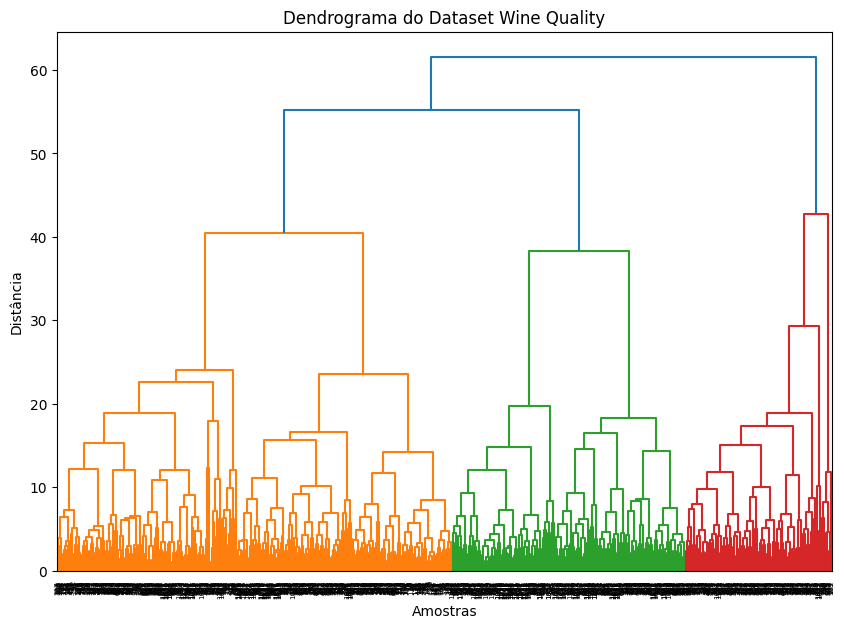

In [ ]:
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrograma do Dataset Wine Quality')
plt.xlabel('Amostras')
plt.ylabel('Distância')
plt.show()

C)

In [ ]:
for n_clusters in range(2, 6):  # Testando de 2 a 5 clusters
    cluster = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='ward')
    cluster_labels = cluster.fit_predict(wine_scaled)
    silhouette_avg = silhouette_score(wine_scaled, cluster_labels)
    print(f'Para n_clusters = {n_clusters}, o coeficiente de silhueta é {silhouette_avg:.2f}')


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Para n_clusters = 2, o coeficiente de silhueta é 0.20
Para n_clusters = 3, o coeficiente de silhueta é 0.14
Para n_clusters = 4, o coeficiente de silhueta é 0.15
Para n_clusters = 5, o coeficiente de silhueta é 0.13


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


D)

O coeficiente de silhueta que obtivemos para 5 clusters no dataset Wine Quality é de 0.13. Este valor está próximo de 0, o que indica que os clusters formados estão sobrepostos e que há uma separação fraca entre eles. Aqui estão algumas considerações e sugestões para melhorar a análise:

### Análise dos Resultados
1. **Baixa Separação entre Clusters**: Um coeficiente de silhueta próximo de zero sugere que os clusters não são muito distintos uns dos outros. Isso pode ser um indicativo de que o número de clusters escolhido não é ideal para a estrutura natural dos dados, ou que o método de clusterização não é adequado para este tipo de dado.

2. **Dendrograma**: A análise do dendrograma pode fornecer insights adicionais. O ponto em que você corta o dendrograma para determinar o número de clusters pode ser ajustado. Se as fusões ocorrem em alturas muito diferentes no dendrograma, isso sugere que a formação dos clusters pode não ser homogênea.

### Sugestões para Melhoria
1. **Exploração de Número de Clusters**: Testar uma gama mais ampla de valores para o número de clusters pode ajudar a encontrar uma estrutura que se ajuste melhor aos dados. É útil visualizar como o coeficiente de silhueta varia com diferentes números de clusters.

2. **Métodos de Clusterização Alternativos**: Além da Clusterização Aglomerativa Hierárquica, outros métodos, como K-Means ou DBSCAN, podem ser mais adequados dependendo da distribuição dos dados. Esses métodos podem lidar de maneira diferente com variações na densidade ou na forma dos clusters.

3. **Análise de Componentes Principais (PCA)**: Aplicar PCA antes da clusterização pode ajudar a reduzir a dimensionalidade e destacar as características mais importantes dos dados. Isso pode levar a uma melhor separação entre os clusters.

4. **Outliers**: Verificar e tratar outliers nos dados pode melhorar a qualidade dos clusters. Outliers podem distorcer a percepção de agrupamento e afetar negativamente o coeficiente de silhueta.

5. **Normalização Alternativa**: Experimentar diferentes métodos de normalização ou padronização pode impactar a formação dos clusters, especialmente se algumas variáveis tiverem mais influência devido à sua variação ou escala.

6. **Validação Externa**: Utilizar métricas de validação externa, caso haja rótulos disponíveis, pode ajudar a entender quão bem os clusters formados correspondem a categorizações conhecidas dos dados.

##Questão 2:

In [ ]:
# Método Elbow para determinar o melhor k
wcss = []
for i in range(1, 11):  # Testando k de 1 a 10
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(wine_scaled)
    wcss.append(kmeans.inertia_)

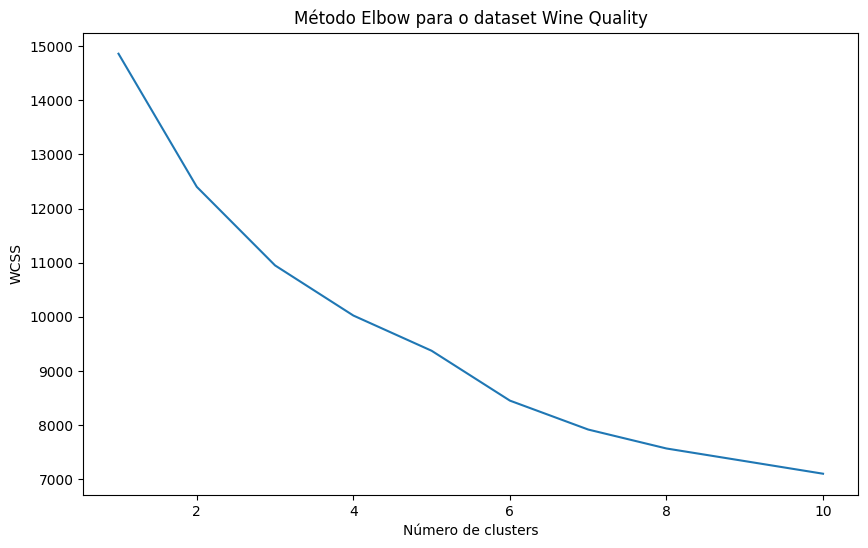

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss)
plt.title('Método Elbow para o dataset Wine Quality')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS')  # Soma dos quadrados intra-cluster
plt.show()

In [ ]:
k_optimo = 2
kmeans_opt = KMeans(n_clusters=k_optimo, init='k-means++', max_iter=300, n_init=10, random_state=0)
cluster_labels = kmeans_opt.fit_predict(wine_scaled)
silhouette_avg = silhouette_score(wine_scaled, cluster_labels)
print(f'Coeficiente de silhueta para k={k_optimo}: {silhouette_avg:.2f}')

Coeficiente de silhueta para k=2: 0.19


Comparando os resultados obtidos das duas abordagens de clusterização no dataset Wine Quality, temos:

### Clusterização Aglomerativa Hierárquica:
- **Número de Clusters:** 5
- **Coeficiente de Silhueta:** 0.13

### KMeans:
- **Número de Clusters:** 2 (determinado pelo método Elbow)
- **Coeficiente de Silhueta:** 0.19

### Análise Comparativa:
1. **Número de Clusters**: A diferença nos números de clusters sugere uma divergência nas estruturas detectadas pelos dois métodos. O KMeans identificou uma solução com menos clusters (2), o que geralmente indica uma visão mais generalizada da divisão dos dados. Por outro lado, a clusterização aglomerativa optou por uma divisão mais granular (5 clusters).

2. **Coeficiente de Silhueta**: O coeficiente de silhueta mais alto para o KMeans (0.19) em comparação com a clusterização aglomerativa (0.13) indica que o KMeans conseguiu formar clusters com maior separação entre os grupos e maior homogeneidade interna. Um valor mais alto neste coeficiente sugere que os pontos dentro de cada cluster estão mais próximos entre si do que dos pontos nos outros clusters, o que é desejável em análises de clusterização.

### Implicações:
- **Adequação do Método**: A superioridade do coeficiente de silhueta no KMeans pode indicar que este método é mais adequado para os dados do Wine Quality em termos de captura da estrutura global dos dados. O método Elbow ajudou a identificar um ponto de equilíbrio entre a complexidade do modelo (número de clusters) e a eficácia da separação, levando a uma melhor performance conforme medido pelo coeficiente de silhueta.

- **Interpretação dos Clusters**: Com menos clusters, o KMeans pode estar fornecendo uma visão mais simplificada e robusta das categorias principais de qualidade do vinho, enquanto a clusterização aglomerativa, com mais clusters, poderia estar detalhando subgrupos que não são tão distintos entre si, o que pode ser menos útil dependendo do objetivo da análise.

### Sugestões para Melhoria:
- **Análise de Outros Parâmetros**: Experimentar com diferentes parâmetros e inicializações nos métodos de clusterização pode ajudar a melhorar ou verificar a estabilidade dos resultados.
- **Validação Externa**: Se houver dados externos disponíveis ou etiquetas de qualidade conhecidas, realizar uma validação externa dos clusters pode fornecer insights adicionais sobre a adequação dos clusters formados.
- **Visualização dos Clusters**: Plotar os clusters usando técnicas de redução de dimensionalidade como PCA ou t-SNE pode oferecer uma visão visual da separação dos clusters e ajudar na interpretação dos resultados.



#Questão 3:

O DBSCAN (Density-Based Spatial Clustering of Applications with Noise) é um algoritmo de clusterização que identifica grupos com base na densidade dos pontos de dados, permitindo identificar qualquer forma de cluster e sendo particularmente eficaz na detecção de outliers ou ruídos. Aqui está uma explicação passo a passo do funcionamento do DBSCAN, incluindo a importância dos parâmetros `epsilon` e `MinPts`:

### Passo 1: Entendendo os Parâmetros
- **Epsilon (ε)**: Este é o raio de uma esfera (ou círculo, em 2D) que é centrada em cada ponto de dados. Se outros pontos de dados caem dentro deste raio, eles são considerados na "vizinhança" do ponto central.
- **MinPts (Min Points)**: Este é o número mínimo de pontos que devem estar dentro do raio epsilon para que um ponto seja considerado um ponto central (ou core).

### Passo 2: Tipos de Pontos
- **Ponto Core**: Um ponto é considerado core se pelo menos `MinPts` estão dentro do raio ε (incluindo o próprio ponto). Estes pontos estão no interior dos clusters.
- **Ponto de Borda**: Um ponto é de borda se está dentro do raio ε de um ponto core, mas ele próprio não tem `MinPts` dentro de seu próprio raio ε.
- **Ruído**: Um ponto é considerado ruído se não é nem um ponto core nem de borda. Isso significa que ele não tem `MinPts` dentro de seu raio ε e não está suficientemente próximo a qualquer ponto core.

### Passo 3: Processo de Clusterização
1. **Inicialização**: O algoritmo começa com um ponto aleatório que não foi visitado.
2. **Verificação de Pontos Core**: Verifica-se se este ponto é um ponto core, ou seja, se há `MinPts` dentro do raio ε.
3. **Expansão do Cluster**: Se o ponto é um core, então todos os pontos dentro de ε são adicionados ao cluster. Para cada um desses pontos, seus vizinhos são também verificados para expansão, e o processo se repete recursivamente.
4. **Continuação**: Se o ponto inicial não é um ponto core, o algoritmo o marca como ruído (por enquanto) e passa para o próximo ponto não visitado.
5. **Finalização**: O processo continua até que todos os pontos tenham sido visitados e classificados como parte de um cluster ou como ruído.

### Importância de Epsilon e MinPts
- A escolha de ε e MinPts depende fortemente da configuração dos dados e da escala das características. Um ε muito grande pode fundir clusters que deveriam ser separados, enquanto um ε muito pequeno pode resultar em muitos pontos sendo marcados como ruído. Similarmente, um valor muito alto para MinPts pode resultar em muitos pontos sendo considerados ruído, enquanto um valor muito baixo pode resultar na criação de muitos clusters pequenos ou na fusão inadequada de clusters.

### Visualização

Cria-se um Dataset hipotético para ilustrar como o DBScan funciona, usando a função "make_blobs" do scikit learn usada para gerar conjuntos de dados sintéticos que consistem em várias "manchas" (blobs) de pontos. Ela é frequentemente utilizada para simular dados para tarefas de clusterização em testes e demonstrações, pois permite controlar facilmente o número de grupos, a dispersão dos grupos, o número de características e a localização dos centros dos grupos. Isso torna make_blobs extremamente útil para testar algoritmos de clusterização como KMeans ou DBSCAN, oferecendo um meio rápido e eficaz de criar dados com propriedades conhecidas. Foram utilizados dados bidimensionais com características de agrupamento e ruído. Vamos criar um dataset que consiste em três clusters com características distintas e alguns pontos de ruído.

In [ ]:
from sklearn.datasets import make_blobs

In [ ]:
# Configurando a geração dos clusters e ruídos
centers = [[2, 2], [-2, -2], [2, -2]]
cluster_std = [0.4, 0.4, 0.4]  # Desvio padrão menor para clusters mais apertados

# Gerando os clusters
X, labels_true = make_blobs(n_samples=300, centers=centers, cluster_std=cluster_std, random_state=42)

# Adicionando ruído
np.random.seed(42)
noise = np.random.uniform(-3, 3, (50, 2))
X = np.vstack([X, noise])

# Normalização dos dados para melhorar a eficácia do DBSCAN
X = StandardScaler().fit_transform(X)

In [ ]:
# Adicionando ruído
np.random.seed(42)
noise = np.random.uniform(-1.5, 1.5, (50, 2))
X = np.vstack([X, noise])

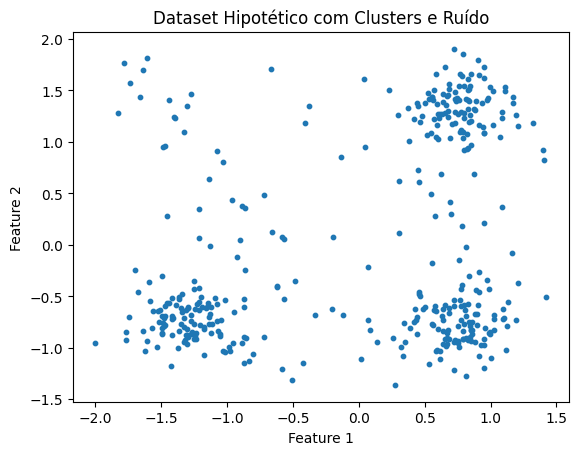

In [ ]:
# Plotando os dados
plt.scatter(X[:, 0], X[:, 1], s=10)
plt.title("Dataset Hipotético com Clusters e Ruído")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

###Aplicar DBSCAN:

Agora, vamos aplicar o DBSCAN a esse dataset, definindo os parâmetros epsilon e MinPts e explicar o impacto de cada um.

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
# Gerando clusters e ruído
centers = [[2, 2], [-2, -2], [2, -2]]
cluster_std = [0.4, 0.4, 0.4]
X, labels_true = make_blobs(n_samples=300, centers=centers, cluster_std=cluster_std, random_state=42)
noise = np.random.uniform(-3, 3, (50, 2))
X = np.vstack([X, noise])
X = StandardScaler().fit_transform(X)


In [ ]:
# Testando DBSCAN com diferentes valores de epsilon
eps_values = np.linspace(0.1, 1.0, 10)  # De 0.1 a 1.0 em 10 passos
MinPts = 5

In [ ]:
for eps in eps_values:
    db = DBSCAN(eps=eps, min_samples=MinPts).fit(X)
    labels = db.labels_
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise_ = list(labels).count(-1)
    print(f'Epsilon: {eps:.2f} -> Número estimado de clusters: {n_clusters_}, Número de ruídos: {n_noise_}')


Epsilon: 0.10 -> Número estimado de clusters: 4, Número de ruídos: 101
Epsilon: 0.20 -> Número estimado de clusters: 3, Número de ruídos: 31
Epsilon: 0.30 -> Número estimado de clusters: 3, Número de ruídos: 24
Epsilon: 0.40 -> Número estimado de clusters: 3, Número de ruídos: 17
Epsilon: 0.50 -> Número estimado de clusters: 2, Número de ruídos: 10
Epsilon: 0.60 -> Número estimado de clusters: 2, Número de ruídos: 2
Epsilon: 0.70 -> Número estimado de clusters: 1, Número de ruídos: 1
Epsilon: 0.80 -> Número estimado de clusters: 1, Número de ruídos: 0
Epsilon: 0.90 -> Número estimado de clusters: 1, Número de ruídos: 0
Epsilon: 1.00 -> Número estimado de clusters: 1, Número de ruídos: 0


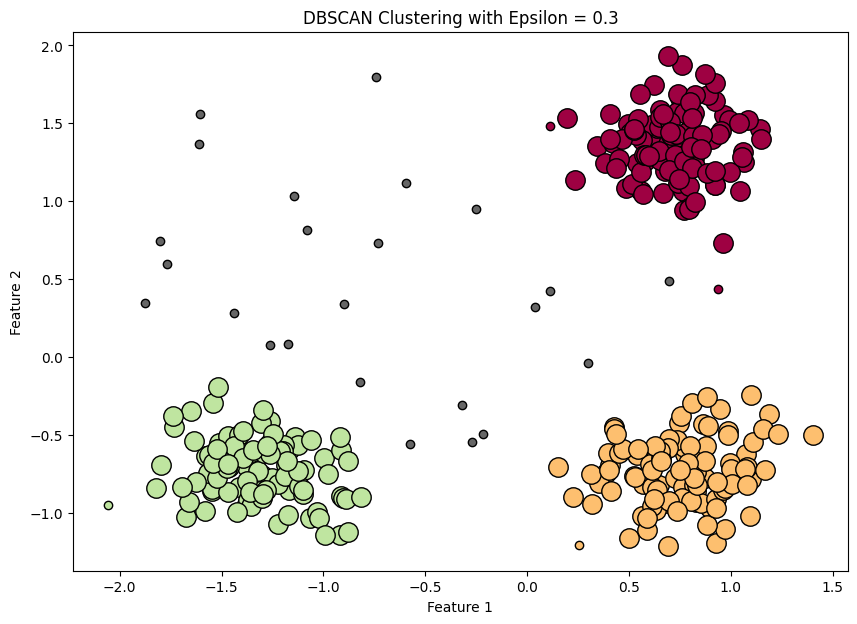

In [ ]:
# Visualização do resultado para um valor específico de epsilon, por exemplo, o melhor encontrado
best_eps = 0.3  #0.3 foi o melhor valor de epsilon encontrado
db_best = DBSCAN(eps=best_eps, min_samples=MinPts).fit(X)
labels_best = db_best.labels_
core_samples_mask_best = np.zeros_like(db_best.labels_, dtype=bool)
core_samples_mask_best[db_best.core_sample_indices_] = True
unique_labels_best = set(labels_best)

# Visualizando os resultados para o melhor epsilon
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels_best))]
plt.figure(figsize=(10, 7))

for k, col in zip(unique_labels_best, colors):
    if k == -1:
        col = [0.4, 0.4, 0.4, 1]  # Cinza para ruído

    class_member_mask = (labels_best == k)

    xy = X[class_member_mask & core_samples_mask_best]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask_best]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=6)

plt.title(f'DBSCAN Clustering with Epsilon = {best_eps}')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

#Questão 4:

In [ ]:
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score

In [ ]:
X = moons_df[['X1', 'X2']].values

In [ ]:
X = StandardScaler().fit_transform(X)

In [ ]:
# Determinando o melhor epsilon usando o gráfico K-Distância
k = 5  # MinPts inicial para a análise do epsilon
nbrs = NearestNeighbors(n_neighbors=k).fit(X)
distances, indices = nbrs.kneighbors(X)

In [ ]:
# Ordenar as distâncias do k-ésimo vizinho mais próximo
k_dist = distances[:, k-1]
k_dist = np.sort(k_dist)


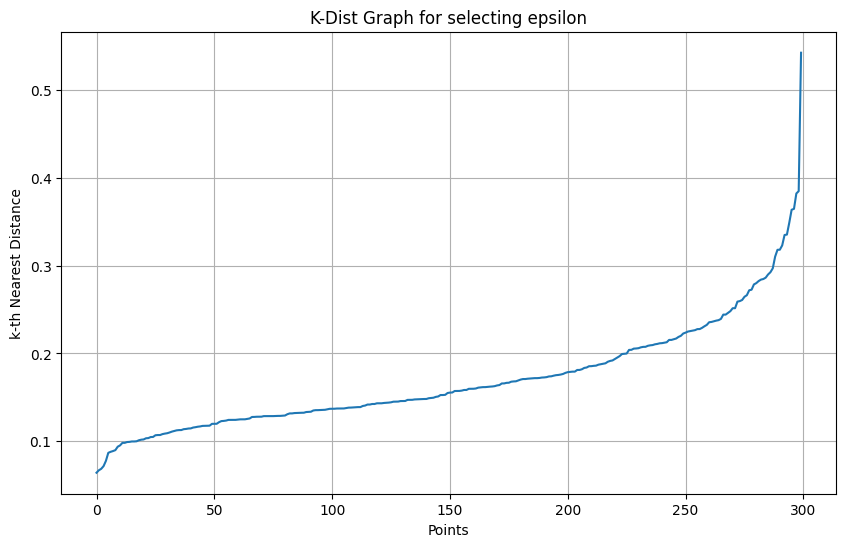

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(k_dist)
plt.title('K-Dist Graph for selecting epsilon')
plt.xlabel('Points')
plt.ylabel('k-th Nearest Distance')
plt.grid(True)
plt.show()

In [ ]:
best_eps = 0.3

# Testando diferentes valores de MinPts e usando silhouette score para encontrar o melhor
best_score = -1
best_minpts = None

for minpts in range(3, 10):  # Testando MinPts de 3 a 10
    db = DBSCAN(eps=best_eps, min_samples=minpts).fit(X)
    labels = db.labels_

    # Filtrando casos sem ruído para calcular o silhouette score
    if len(set(labels)) > 1 and np.any(labels != -1):
        score = silhouette_score(X, labels)
        if score > best_score:
            best_score = score
            best_minpts = minpts

print(f'Melhor MinPts: {best_minpts} com silhouette score de: {best_score}')

Melhor MinPts: 6 com silhouette score de: 0.2525353648445037


In [ ]:
# Aplicando DBSCAN com os melhores parâmetros encontrados
db = DBSCAN(eps=best_eps, min_samples=best_minpts)
labels = db.fit_predict(X)
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print(f'Número estimado de clusters: {n_clusters_}')

Número estimado de clusters: 2


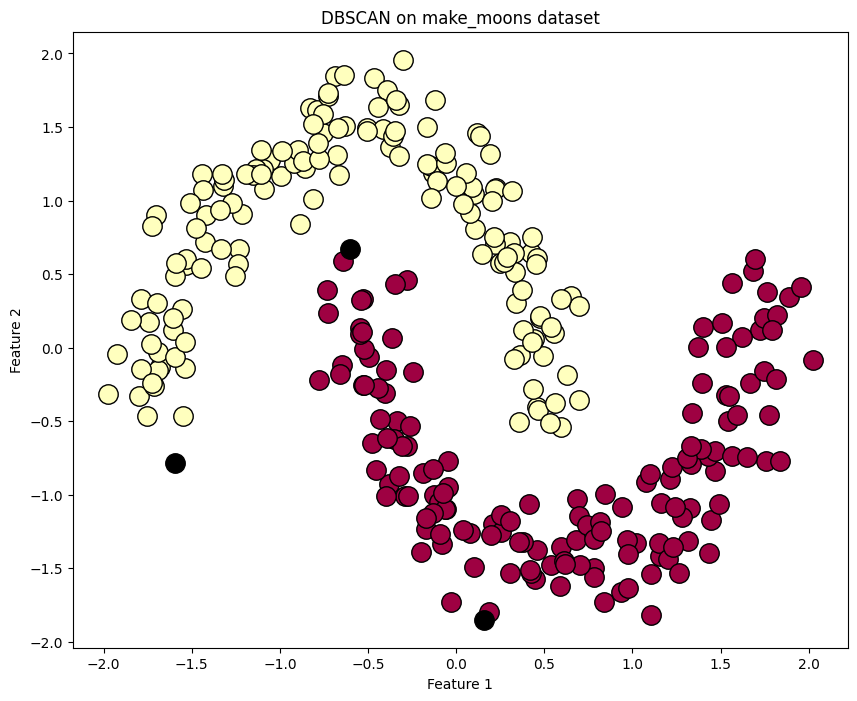

In [ ]:
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

plt.figure(figsize=(10, 8))
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Ruído é plotado em preto
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=14)

plt.title('DBSCAN on make_moons dataset')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

#Questão 5:

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
# Vetorização TF-IDF
vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
X = vectorizer.fit_transform(amazon_train['text'])

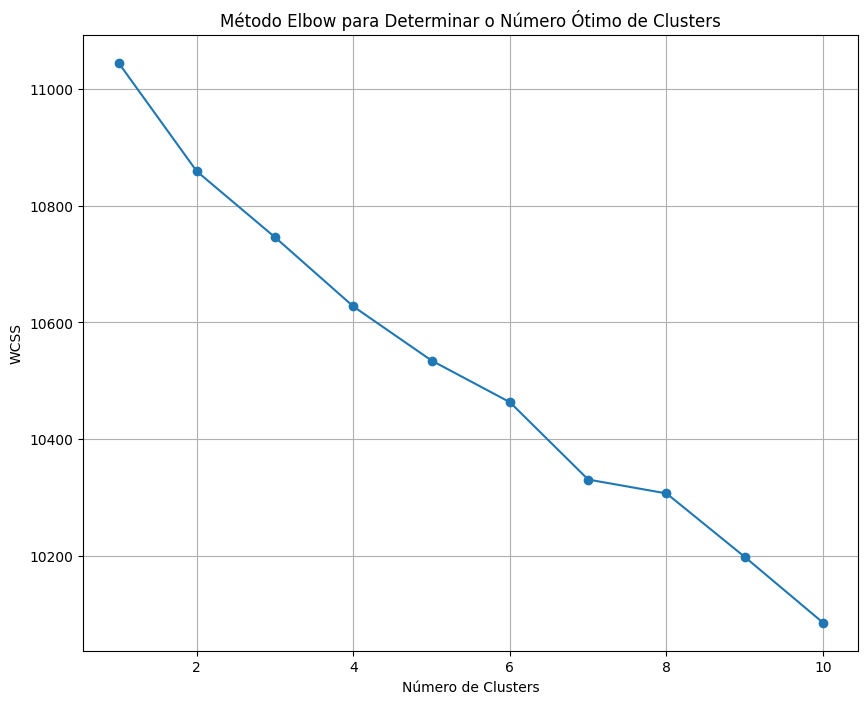

In [ ]:
# Calculando WCSS para diferentes valores de 'k'
wcss = []
for i in range(1, 11):  # Testando de 1 a 10 clusters
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plotando o gráfico Elbow
plt.figure(figsize=(10, 8))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Método Elbow para Determinar o Número Ótimo de Clusters')
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [ ]:
# Número de clusters a serem formados
n_clusters = 8

In [ ]:
# Inicializando e aplicando o KMeans
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X)

# Etiquetas dos clusters para cada documento
labels = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
def get_top_keywords(data, clusters, labels, n_terms):
    df = pd.DataFrame(data.todense()).groupby(clusters).mean()
    terms = vectorizer.get_feature_names_out()
    for i, r in df.iterrows():
        print('\nCluster {}'.format(i))
        print(', '.join([terms[t] for t in np.argsort(r)[-n_terms:]]))

get_top_keywords(X, labels, vectorizer.get_feature_names_out(), 10)


Cluster 0
happening, list, meeting, news, olly, day, need, weather, date, today

Cluster 1
date, today, weather, new, list, latest, news, joke, time, tell

Cluster 2
seven, remove, event, morning, alarms, tomorrow, meeting, reminder, alarm, set

Cluster 3
favorite, episode, game, songs, radio, podcast, playlist, song, music, play

Cluster 4
emails, song, olly, event, news, calendar, new, email, time, list

Cluster 5
local, going, scheduled, happening, today, delete, remove, upcoming, calendar, events

Cluster 6
change, plug, volume, living, radio, socket, light, room, lights, turn

Cluster 7
right, going, email, forecast, remind, like, meeting, week, tomorrow, weather


### Interpretação dos Clusters

**Cluster 0**:
- **Temas Principais**: Informações diárias e notícias.
- **Palavras-chave**: "happening", "news", "weather", "today".
- **Interpretação**: Este cluster parece conter comandos relacionados a atualizações diárias e notícias, com foco no que está acontecendo atualmente ou no que é necessário para o dia.

**Cluster 1**:
- **Temas Principais**: Atualizações gerais e entretenimento.
- **Palavras-chave**: "news", "joke", "latest", "tell".
- **Interpretação**: Este cluster inclui comandos para obter notícias e entretenimento, como ouvir uma piada ou obter as últimas notícias.

**Cluster 2**:
- **Temas Principais**: Gerenciamento de alarmes e eventos.
- **Palavras-chave**: "alarms", "reminder", "meeting", "set".
- **Interpretação**: Este cluster é focado em configurações de alarmes e lembretes para eventos e reuniões, indicando comandos usados para organizar eventos futuros.

**Cluster 3**:
- **Temas Principais**: Entretenimento musical e áudio.
- **Palavras-chave**: "music", "song", "play", "playlist".
- **Interpretação**: Este cluster agrupa comandos relacionados à reprodução de música, episódios de podcasts ou programas de rádio, indicando uso para entretenimento áudio.

**Cluster 4**:
- **Temas Principais**: Comunicações e informações.
- **Palavras-chave**: "emails", "calendar", "email", "news".
- **Interpretação**: Este cluster lida com gerenciamento de e-mails e informações do calendário, além de atualizações de notícias.

**Cluster 5**:
- **Temas Principais**: Gerenciamento de eventos.
- **Palavras-chave**: "events", "calendar", "upcoming", "delete".
- **Interpretação**: Comandos focados em gerenciar eventos no calendário, como excluir ou visualizar eventos próximos.

**Cluster 6**:
- **Temas Principais**: Automação residencial.
- **Palavras-chave**: "turn", "lights", "volume", "plug".
- **Interpretação**: Este cluster inclui comandos para controlar dispositivos domésticos inteligentes, como luzes, tomadas e dispositivos de áudio.

**Cluster 7**:

- **Temas Principais**: Planejamento e informações diárias.
- **Palavras-chave**: "weather", "meeting", "tomorrow", "week".
- **Interpretação**: Este cluster parece centrar-se em comandos que solicitam informações sobre previsões do tempo e planejamentos de reuniões ou eventos para o dia seguinte ou a semana. Comandos como "remind me about the meeting tomorrow" ou "what’s the weather like for this week?" podem ser típicos deste cluster. Este é um cluster voltado para a organização pessoal e obtenção de informações relevantes para atividades futuras.


A análise dos resultados obtidos através da aplicação do modelo K-means, utilizando o método Elbow para determinar o número ótimo de clusters, revela que:

### 1. **Modelo K-means e Sua Aplicabilidade a Dados Textuais**

O K-means é um algoritmo de clusterização que busca minimizar a variação dentro dos clusters e maximizar a variação entre clusters. Quando aplicado a dados textuais transformados em TF-IDF, o algoritmo procura agrupar textos que possuem termos similares. No entanto, há alguns desafios específicos:

- **Esparsidade dos Dados**: Textos transformados em TF-IDF resultam em matrizes esparsas, onde a maioria dos valores é zero. Isso pode complicar a capacidade do K-means de calcular distâncias eficazmente, uma vez que a distância euclidiana, utilizada no K-means, nem sempre é a melhor métrica para dados esparsos e de alta dimensionalidade.

- **Sensibilidade a Inicializações e Escolha de `k`**: O K-means é sensível à escolha inicial dos centroides e ao número de clusters (`k`). Uma escolha inadequada pode levar a resultados subótimos, como clusters desbalanceados ou não representativos.

### 2. **Método Elbow para Determinar o Número de Clusters**

O método Elbow é utilizado para escolher um número apropriado de clusters observando onde a redução no Within-Cluster Sum of Squares (WCSS) começa a diminuir menos rapidamente. Essencialmente, busca-se um ponto onde aumentar o número de clusters não resulta em melhorias significativas na compactação dos clusters.

- **Identificação do Ponto de Cotovelo**: Neste caso, o gráfico Elbow mostrou uma queda contínua até 7 clusters e uma mudança novamente em 8 clusters. Isso pode indicar uma escolha entre 7 e 8 clusters, dependendo de onde se percebe o "cotovelo" mais claro. A análise subjetiva do ponto de cotovelo pode ser um desafio quando a curva é gradual.

### 3. **Análise dos Resultados dos Clusters**

Os resultados revelaram oito clusters distintos, cada um agrupando intenções de comando com temas relacionados, desde gerenciamento de eventos e entretenimento até automação residencial. Esses clusters sugerem que o K-means foi capaz de encontrar agrupamentos significativos no dataset, embora a escolha de `k=8` tenha sido um pouco arbitrária sem um "cotovelo" claro.

- **Avaliação Qualitativa**: A avaliação dos termos mais frequentes em cada cluster mostra que eles são tematicamente coerentes, o que indica que o número de clusters escolhido foi razoável para capturar a variedade de intenções dos comandos.

#Questão 6:

In [ ]:
from sklearn.decomposition import NMF

In [ ]:
texts = amazon_train['text'].values

In [ ]:
vectorizer = TfidfVectorizer(max_features=2000, stop_words='english')
X = vectorizer.fit_transform(texts)

In [ ]:
# Configuração do NMF
n_components = 10  # Número de tópicos
nmf = NMF(n_components=n_components, random_state=42)
W = nmf.fit_transform(X)  # W: matriz documento-tópico
H = nmf.components_  # H: matriz tópico-termo

In [ ]:
feature_names = vectorizer.get_feature_names_out()

def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Tópico %d:" % (topic_idx))
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

display_topics(nmf, feature_names, 10)

Tópico 0:
play music playlist podcast radio songs episode game want favorite
Tópico 1:
set alarm meeting tomorrow reminder alarms morning seven remind need
Tópico 2:
list remove shopping delete grocery item start add create make
Tópico 3:
today weather date day need happening olly going meeting events
Tópico 4:
time train current right york zone does date meeting london
Tópico 5:
turn lights room light volume radio socket living plug kitchen
Tópico 6:
new email emails send check york reply add address contact
Tópico 7:
calendar event add delete events remove clear meeting week birthday
Tópico 8:
tell news latest weather joke week olly world trump current
Tópico 9:
song playing repeat save current olly good favorite want artist


### Análise dos Tópicos

**Tópico 0: Entretenimento Áudio**
- **Palavras-chave**: play, music, playlist, podcast, radio, songs, episode, game, want, favorite.
- **Interpretação**: Este tópico agrupa comandos relacionados ao entretenimento áudio, incluindo música, podcasts e rádio. Indica que uma função significativa dos dispositivos é servir como plataformas de entretenimento.

**Tópico 1: Gerenciamento de Alarmes e Lembretes**
- **Palavras-chave**: set, alarm, meeting, tomorrow, reminder, alarms, morning, seven, remind, need.
- **Interpretação**: Focado em definir alarmes e lembretes para eventos e compromissos, o que é essencial para usuários que gerenciam sua agenda através de comandos de voz.

**Tópico 2: Gerenciamento de Listas**
- **Palavras-chave**: list, remove, shopping, delete, grocery, item, start, add, create, make.
- **Interpretação**: Este tópico trata da criação e gerenciamento de listas, especialmente de compras, indicando o uso dos dispositivos para ajudar nas tarefas domésticas diárias.

**Tópico 3: Informações Diárias**
- **Palavras-chave**: today, weather, date, day, need, happening, olly, going, meeting, events.
- **Interpretação**: Comandos focados em obter informações sobre o dia atual, incluindo o clima e eventos, sugerindo uma utilização dos dispositivos como assistentes diários.

**Tópico 4: Consultas de Tempo e Localização**
- **Palavras-chave**: time, train, current, right, york, zone, does, date, meeting, london.
- **Interpretação**: Este tópico envolve questões sobre tempo e locais específicos, indicativo de uso para planejamento de viagens ou consulta de horários.

**Tópico 5: Controle de Dispositivos Domésticos**
- **Palavras-chave**: turn, lights, room, light, volume, radio, socket, living, plug, kitchen.
- **Interpretação**: Comandos para controle de dispositivos domésticos inteligentes, mostrando uma forte tendência para automação residencial.

**Tópico 6: Gerenciamento de E-mails**
- **Palavras-chave**: new, email, emails, send, check, york, reply, add, address, contact.
- **Interpretação**: Focado no gerenciamento de e-mails, sugerindo o uso de assistentes de voz para comunicações via e-mail.

**Tópico 7: Gerenciamento de Calendário**
- **Palavras-chave**: calendar, event, add, delete, events, remove, clear, meeting, week, birthday.
- **Interpretação**: Relacionado à organização e gestão de eventos no calendário, crucial para usuários que dependem de assistentes de voz para gerenciar suas agendas.

**Tópico 8: Notícias e Informações Gerais**
- **Palavras-chave**: tell, news, latest, weather, joke, week, olly, world, trump, current.
- **Interpretação**: Agrupa comandos para obter notícias e atualizações gerais, indicando uma utilização para manter-se informado sobre eventos globais e locais.

**Tópico 9: Interesses Musicais**
- **Palavras-chave**: song, playing, repeat, save, current, olly, good, favorite, want, artist.
- **Interpretação**: Este tópico foca em funções específicas relacionadas à música, como repetir e salvar faixas, refletindo o interesse dos usuários em funções musicais personalizadas.

### Implicações e Ações Sugeridas

1. **Desenvolvimento de Produto**: Os insights dos tópicos podem direcionar o desenvolvimento de novas funcionalidades ou a melhoria de funcionalidades existentes nos dispositivos. Por exemplo, aprimorar a interação de controle de dispositivos domésticos ou melhorar a interface para gerenciamento de e-mails e calendários.

2. **Marketing e Publicidade**: Os tópicos identificados podem ajudar a segmentar campanhas de marketing ou a personalizar anúncios com base nas preferências dos usuários, como campanhas focadas em usuários interessados em automação residencial ou em serviços de entretenimento áudio.

3. **Interface do Usuário**: Melhorar a usabilidade das funções mais utilizadas, como controle de mídia e informações diárias, pode aumentar significativamente a satisfação do usuário e a adesão ao produto.

4. **Feedback e Educação do Usuário**: Ensinar os usuários sobre funcionalidades menos utilizadas ou menos compreendidas que aparecem nos tópicos pode aumentar o engajamento e a utilidade percebida dos dispositivos.


#Questão 7:

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
# Vetorização usando CountVectorizer
vectorizer = CountVectorizer(max_features=2000, stop_words='english')
X = vectorizer.fit_transform(texts)

In [ ]:
n_components = 10  # Número de tópicos
lda = LatentDirichletAllocation(n_components=n_components, random_state=42, learning_method='batch')
lda.fit(X)

LatentDirichletAllocation(random_state=42)

In [ ]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Tópico %d:" % topic_idx)
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

feature_names = vectorizer.get_feature_names_out()
display_topics(lda, feature_names, 10)

Tópico 0:
set alarm start reminder podcast seven alarms playing volume song
Tópico 1:
play music song week want radio playlist songs hear game
Tópico 2:
make tweet coffee good olly complaint service did post facebook
Tópico 3:
today weather day events date month thousand trump calendar clear
Tópico 4:
list turn calendar remove delete event add schedule lights appointment
Tópico 5:
email send tomorrow new event add john list create shopping
Tópico 6:
time remind meeting right food favorite does look minutes thirty
Tópico 7:
new emails know open let order york book pizza train
Tópico 8:
train lights light stock ticket does traffic change current rate
Tópico 9:
tell news latest going need birthday area party restaurant weekend


### Análise Detalhada dos Tópicos

**Tópico 0: Gerenciamento de Alarmes e Podcasts**
- **Palavras-chave**: set, alarm, start, reminder, podcast, seven, alarms, playing, volume, song.
- **Interpretação**: Este tópico foca principalmente no ajuste de alarmes e lembretes, com menções a ajustes de volume e reprodução de podcasts e músicas. Parece servir para configurações rápidas e específicas de lembretes ou para iniciar mídia.

**Tópico 1: Entretenimento Musical e Jogos**
- **Palavras-chave**: play, music, song, week, want, radio, playlist, songs, hear, game.
- **Interpretação**: Concentra-se em comandos para reprodução de música e conteúdo de rádio, incluindo jogos. Indica o uso de dispositivos como centros de entretenimento.

**Tópico 2: Comunicações Sociais e Serviços**
- **Palavras-chave**: make, tweet, coffee, good, olly, complaint, service, did, post, facebook.
- **Interpretação**: Relacionado a interações sociais e serviços, como postar em redes sociais ou fazer pedidos de serviços, inclusive reclamações.

**Tópico 3: Informações Diárias e Agendamento**
- **Palavras-chave**: today, weather, day, events, date, month, thousand, trump, calendar, clear.
- **Interpretação**: Abrange a busca por informações sobre o tempo e eventos específicos de datas, além de referências a notícias e limpeza de agendas.

**Tópico 4: Gerenciamento de Eventos e Dispositivos Domésticos**
- **Palavras-chave**: list, turn, calendar, remove, delete, event, add, schedule, lights, appointment.
- **Interpretação**: Este tópico lida com o gerenciamento de eventos e tarefas no calendário e controle de dispositivos domésticos como luzes.

**Tópico 5: Emails e Planejamento**
- **Palavras-chave**: email, send, tomorrow, new, event, add, john, list, create, shopping.
- **Interpretação**: Focado em comunicações via email e organização de eventos futuros, mostrando o uso do dispositivo para planejamento pessoal e profissional.

**Tópico 6: Lembretes e Consultas de Tempo**
- **Palavras-chave**: time, remind, meeting, right, food, favorite, does, look, minutes, thirty.
- **Interpretação**: Envolve lembretes e consultas de tempo, com uma mistura de comandos pessoais e profissionais para organização e consulta.

**Tópico 7: Novidades e Pedidos**
- **Palavras-chave**: new, emails, know, open, let, order, york, book, pizza, train.
- **Interpretação**: Combina a gestão de novas mensagens, pedidos de produtos ou serviços e consultas sobre novidades ou recomendações.

**Tópico 8: Transporte e Automação Residencial**
- **Palavras-chave**: train, lights, light, stock, ticket, does, traffic, change, current, rate.
- **Interpretação**: Relacionado ao transporte e controle residencial, com uma inclinação para ajustes e consultas sobre condições atuais e viagens.

**Tópico 9: Notícias e Eventos Sociais**
- **Palavras-chave**: tell, news, latest, going, need, birthday, area, party, restaurant, weekend.
- **Interpretação**: Focado em obter notícias, informações sobre eventos sociais e planejamentos de atividades de lazer.

### Conclusões e Implicações

Os tópicos identificados pelo LDA oferecem uma visão das diferentes maneiras pelas quais os usuários interagem com seus dispositivos de comando de voz. Cada tópico representa uma faceta distinta do uso diário, desde funções utilitárias até entretenimento e comunicação social.

- **Desenvolvimento de Produto**: Esses insights podem guiar o desenvolvimento de novas funcionalidades ou aprimoramento das existentes para atender melhor às necessidades reveladas pelos tópicos.
- **Marketing e Educação do Usuário**: Identificar esses tópicos permite a criação de campanhas de marketing direcionadas e programas de educação para usuários que mostram como aproveitar ao máximo as funcionalidades do dispositivo.
- **Melhoria da Experiência do Usuário**: Compreender as categorias de uso pode ajudar a refinar a interface do usuário e melhorar a integração do assistente de voz com outras plataformas e serviços.

#Questão 8:

In [ ]:
X = breast_cancer_df.drop(columns=['target'])
y = breast_cancer_df['target']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
n_clusters = 4

# Aplicar KMeans
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X_scaled)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

In [ ]:
# Usar as distâncias aos centroides como novas características
X_kmeans = kmeans.transform(X_scaled)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
from sklearn.decomposition import PCA

# Definir o número de componentes
n_components = 4

# Aplicar PCA
pca = PCA(n_components=n_components, random_state=42)
X_pca = pca.fit_transform(X_scaled)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Variância explicada pelos componentes principais do PCA
explained_variance_pca = pca.explained_variance_ratio_
print("Variância explicada pelos componentes do PCA:", explained_variance_pca)
print("Variância total explicada pelo PCA:", np.sum(explained_variance_pca))

# A variância explicada pelo KMeans não é uma métrica direta, mas podemos avaliar os clusters
print("Inércia (soma das distâncias quadradas aos centroides) do KMeans:", kmeans.inertia_)


Variância explicada pelos componentes do PCA: [0.44272026 0.18971182 0.09393163 0.06602135]
Variância total explicada pelo PCA: 0.7923850582444207
Inércia (soma das distâncias quadradas aos centroides) do KMeans: 9259.536571689416


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#**Comparação Visual**

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Text(0, 0.5, 'Componente 2')

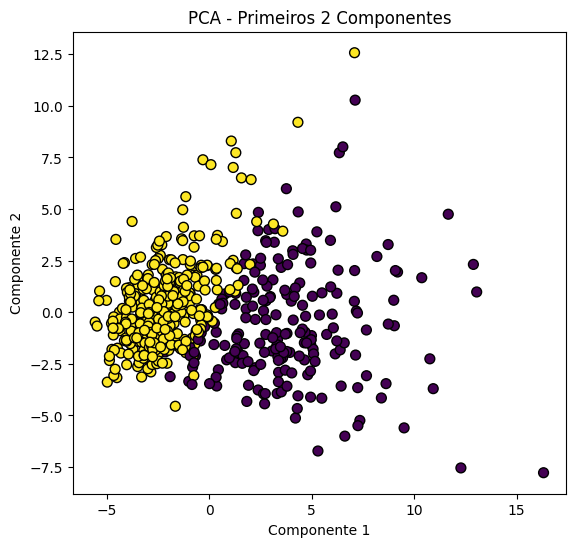

In [ ]:
# Visualizar os dois primeiros componentes do PCA
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
plt.title('PCA - Primeiros 2 Componentes')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


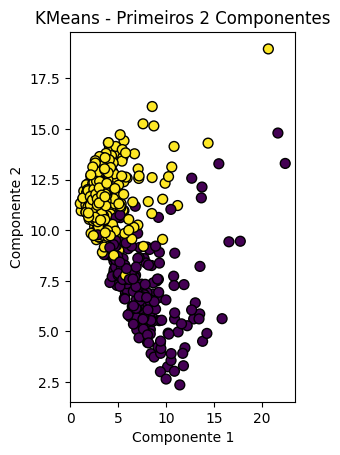

In [ ]:
# Visualizar os dois primeiros componentes do KMeans
plt.subplot(1, 2, 2)
plt.scatter(X_kmeans[:, 0], X_kmeans[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
plt.title('KMeans - Primeiros 2 Componentes')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')

plt.show()

### Análise dos Resultados

#### PCA (Principal Component Analysis)
O PCA visa capturar a maior quantidade de variação nos dados com o menor número de componentes. As variâncias explicadas pelos componentes do PCA são:

- **Primeiro Componente**: 44.27%
- **Segundo Componente**: 18.97%
- **Terceiro Componente**: 9.39%
- **Quarto Componente**: 6.60%

A soma da variância total explicada pelos 4 componentes principais é 79.24%. Isso significa que esses 4 componentes capturam aproximadamente 79% da variância total nos dados originais.

#### KMeans (K-Means Clustering)
O KMeans não fornece uma métrica direta de variância explicada como o PCA. Em vez disso, ele minimiza a soma das distâncias quadradas dos pontos aos centroides dos clusters (inércia). A inércia fornece uma indicação de quão compactos são os clusters formados, mas não é diretamente comparável à variância explicada pelo PCA.

### Conclusão

#### PCA:
- **Vantagens**: O PCA fornece uma redução de dimensionalidade que maximiza a variância explicada, o que pode ser interpretado como uma forma de capturar a estrutura mais significativa dos dados.
- **Desvantagens**: As componentes principais podem não ter uma interpretação direta em termos de variáveis originais.

#### KMeans:
- **Vantagens**: KMeans captura a estrutura de agrupamento nos dados. As novas características representadas pelas distâncias aos centroides dos clusters podem ser úteis para análise de similaridade e agrupamento.
- **Desvantagens**: A interpretação das novas características (distâncias aos centroides) não é tão intuitiva quanto as componentes principais do PCA.

### Escolha do Método
A escolha entre PCA e KMeans para redução de dimensionalidade depende do objetivo da análise:
- **Se o objetivo é capturar a variabilidade global dos dados de forma explicável**, o PCA é geralmente mais adequado.
- **Se o objetivo é capturar a estrutura de agrupamento dos dados**, as características derivadas do KMeans podem ser mais úteis.

Ambos os métodos oferecem insights valiosos e podem ser complementares em uma análise mais ampla.

Link para o Google Colab: https://colab.research.google.com/drive/1R6zr7-7-e4aC7FuA7yR9KxsmdDz01dJ2?usp=sharing